In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('GEOS566 HW1.csv')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(df)

        D     H   Tsnow    Tmin    Tmax       Lat     Dec       e2
0     274   100  -4.844   1.363   3.310  37.90833     NaN      NaN
1     274   200  -5.354   1.431   3.714  37.90833     NaN      NaN
2     274   300  -5.572   0.563   3.317  37.90833     NaN      NaN
3     274   400  -4.163   2.646   3.922  37.90833     NaN      NaN
4     274   500  -4.030   2.370   3.983  37.90833     NaN      NaN
5     274   600  -3.281   2.840   3.646  37.90833     NaN      NaN
6     274   700  -1.575   2.840   4.586  37.90833     NaN      NaN
7     274   800   1.570   4.452   5.654  37.90833     NaN      NaN
8     274   900   5.664   5.183   8.060  37.90833     NaN      NaN
9     274  1000  13.060   7.190   9.860  37.90833     NaN      NaN
10    274  1100  13.500   9.050   9.980  37.90833     NaN      NaN
11    274  1200  12.790   9.370   9.970  37.90833     NaN      NaN
12    274  1300  14.930   9.300  10.380  37.90833     NaN      NaN
13    274  1400  15.120   9.100  10.440  37.90833     NaN     

In [3]:
daily=df.groupby('D')[['Dec','e2']].first()
daily=daily.interpolate().ffill().bfill()

df['Dec']=df['D'].map(daily['Dec'])
df['e2']=df['D'].map(daily['e2'])

print(df)

        D     H   Tsnow    Tmin    Tmax       Lat        Dec        e2
0     274   100  -4.844   1.363   3.310  37.90833   3.567000  1.004660
1     274   200  -5.354   1.431   3.714  37.90833   3.567000  1.004660
2     274   300  -5.572   0.563   3.317  37.90833   3.567000  1.004660
3     274   400  -4.163   2.646   3.922  37.90833   3.567000  1.004660
4     274   500  -4.030   2.370   3.983  37.90833   3.567000  1.004660
5     274   600  -3.281   2.840   3.646  37.90833   3.567000  1.004660
6     274   700  -1.575   2.840   4.586  37.90833   3.567000  1.004660
7     274   800   1.570   4.452   5.654  37.90833   3.567000  1.004660
8     274   900   5.664   5.183   8.060  37.90833   3.567000  1.004660
9     274  1000  13.060   7.190   9.860  37.90833   3.567000  1.004660
10    274  1100  13.500   9.050   9.980  37.90833   3.567000  1.004660
11    274  1200  12.790   9.370   9.970  37.90833   3.567000  1.004660
12    274  1300  14.930   9.300  10.380  37.90833   3.567000  1.004660
13    

In [4]:
#Fix units! Need radians for python trigonometric functions
df['Lat']=np.radians(df['Lat'])
df['Dec']=np.radians(df['Dec'])
df['H']=df['H']/100 #convert hours to 0-24 scale

print(df)

        D     H   Tsnow    Tmin    Tmax       Lat       Dec        e2
0     274   1.0  -4.844   1.363   3.310  0.661625  0.062256  1.004660
1     274   2.0  -5.354   1.431   3.714  0.661625  0.062256  1.004660
2     274   3.0  -5.572   0.563   3.317  0.661625  0.062256  1.004660
3     274   4.0  -4.163   2.646   3.922  0.661625  0.062256  1.004660
4     274   5.0  -4.030   2.370   3.983  0.661625  0.062256  1.004660
5     274   6.0  -3.281   2.840   3.646  0.661625  0.062256  1.004660
6     274   7.0  -1.575   2.840   4.586  0.661625  0.062256  1.004660
7     274   8.0   1.570   4.452   5.654  0.661625  0.062256  1.004660
8     274   9.0   5.664   5.183   8.060  0.661625  0.062256  1.004660
9     274  10.0  13.060   7.190   9.860  0.661625  0.062256  1.004660
10    274  11.0  13.500   9.050   9.980  0.661625  0.062256  1.004660
11    274  12.0  12.790   9.370   9.970  0.661625  0.062256  1.004660
12    274  13.0  14.930   9.300  10.380  0.661625  0.062256  1.004660
13    274  14.0  15.

In [5]:
#Defining constants

w=np.radians(15) # pi/12 rad per hour or 15 degrees per hour (angular velocity of Earth)
I0=1380 #W/m^2 (solar constant)

#Calculating cos(z)

df['cosz']=np.sin(df['Lat'])*np.sin(df['Dec']) + np.cos(df['Lat'])*np.cos(df['Dec'])*np.cos(w*(df['H']-12))


In [6]:
#potential solar radiation

df['I']=I0*df['cosz']/df['e2']

df.loc[df['I']<0,'I']=0

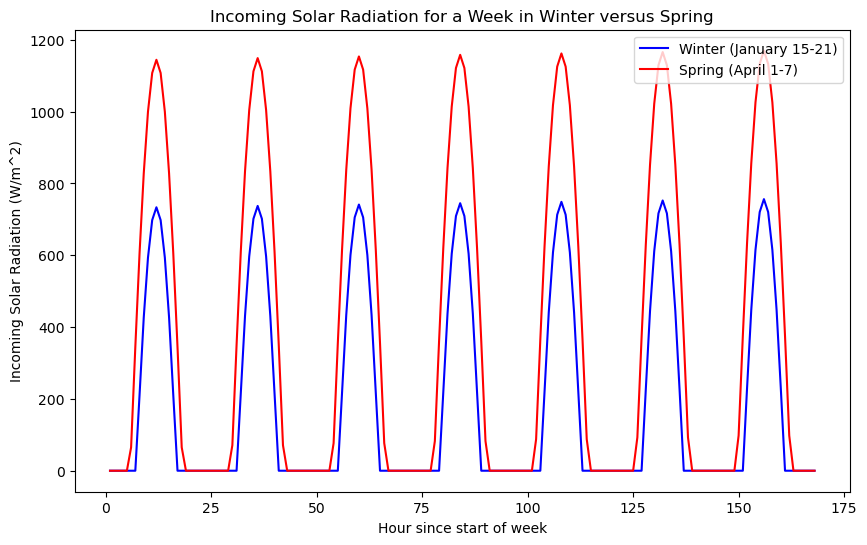

756.3491713253192
1169.6817135779818


In [7]:
#plot incoming solar radiation for a week in winter and a week in spring

fig, ax = plt.subplots(figsize=(10,6))

winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()

winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']

ax.plot(winter['t'], winter['I'], label='Winter (January 15-21)', color='blue')
ax.plot(spring['t'], spring['I'], label='Spring (April 1-7)', color='red')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Incoming Solar Radiation for a Week in Winter versus Spring')
ax.legend()
plt.show()

print(winter['I'].max())
print(spring['I'].max())

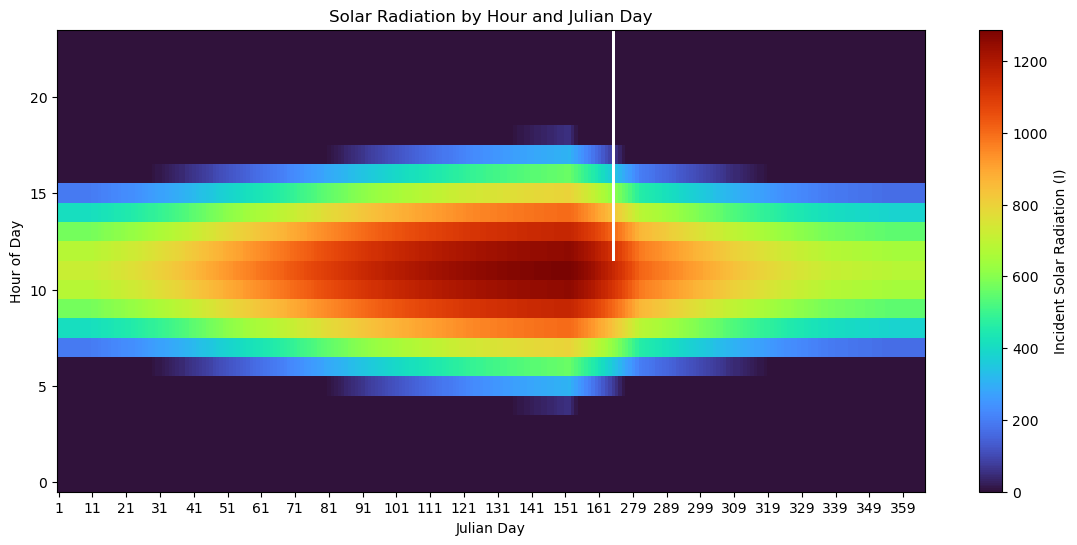

In [9]:
#What does the solar radiation look like for the full year? Creating a "heatmap" of julian days versus hour in the day with color corresponding to amount of solar radiation.
heatmap_data = df.pivot_table(index='H', columns='D', values='I')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()


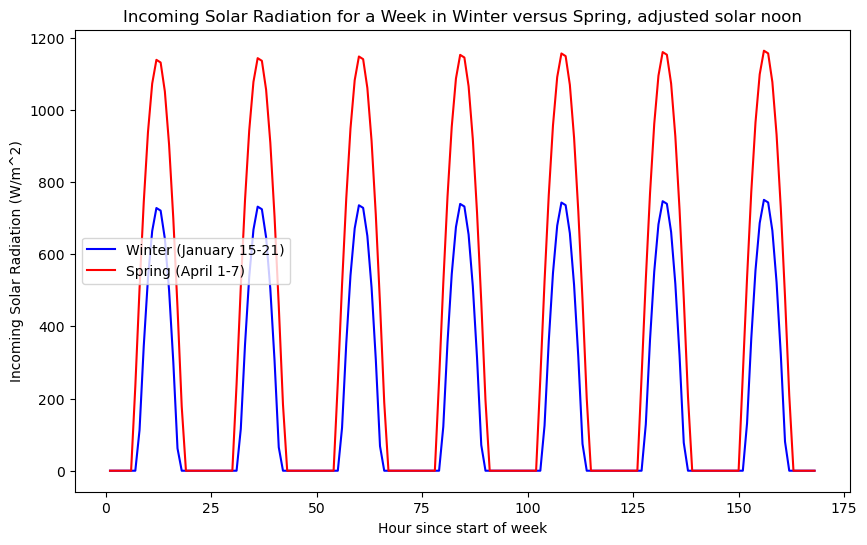

750.5796773374261
1163.810348406532


In [24]:
# What if true solar noon is at 12:24 pm? Then the hour difference from solar noon component needs to be H-12.4 instead of H-12. I don't think that 0.4 can have much of an impact inside a cosine function...

df['cosz']=np.sin(df['Lat'])*np.sin(df['Dec']) + np.cos(df['Lat'])*np.cos(df['Dec'])*np.cos(w*(df['H']-12.4))
df['I']=I0*df['cosz']/df['e2']
df.loc[df['I']<0,'I']=0

fig, ax = plt.subplots(figsize=(10,6))

winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()

winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']

ax.plot(winter['t'], winter['I'], label='Winter (January 15-21)', color='blue')
ax.plot(spring['t'], spring['I'], label='Spring (April 1-7)', color='red')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Incoming Solar Radiation for a Week in Winter versus Spring, adjusted solar noon')
ax.legend()
plt.show()

print (winter['I'].max())
print (spring['I'].max())

In [10]:
#modifying for slope and aspect

def I_adj(Lat,Dec,H,slope,aspect,I0,e2):
    adjusted_Lat=np.arcsin(np.sin(slope)*np.cos(aspect)*np.cos(Lat) + np.cos(slope)*np.sin(Lat))
    adjusted_Long=np.arctan2((np.sin(aspect)*np.sin(slope)),((np.cos(slope)*np.cos(Lat))-(np.cos(aspect)*np.sin(slope)*np.sin(Lat))))
    adjusted_cosz=np.sin(adjusted_Lat)*np.sin(Dec) + np.cos(adjusted_Lat)*np.cos(Dec)*np.cos(w*(H-12)-adjusted_Long)
    adjusted_I=I0*adjusted_cosz/e2
    adjusted_I[adjusted_I<0]=0
    return adjusted_I



slope=np.radians(35) #35 degree slope
aspect=np.radians(0) #N-facing slope

df['I35N']=I_adj(df['Lat'],df['Dec'],df['H'],slope,aspect,I0,df['e2'])

aspect=np.radians(180) #S-facing slope

df['I35S']=I_adj(df['Lat'],df['Dec'],df['H'],slope,aspect,I0,df['e2'])

print(df.columns)

Index(['D', 'H', 'Tsnow', 'Tmin', 'Tmax', 'Lat', 'Dec', 'e2', 'cosz', 'I',
       'I35N', 'I35S'],
      dtype='object')


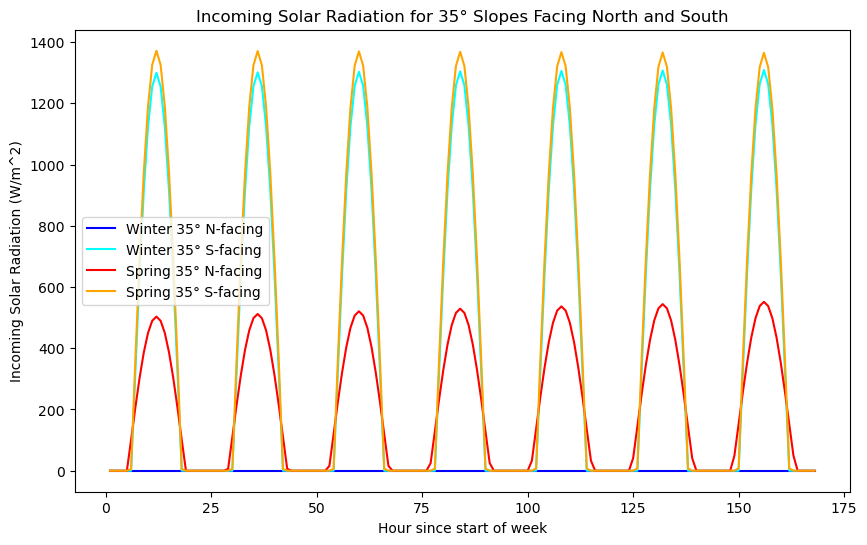

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()
winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']
ax.plot(winter['t'], winter['I35N'], label='Winter 35° N-facing', color='blue')
ax.plot(winter['t'], winter['I35S'], label='Winter 35° S-facing', color='cyan')
ax.plot(spring['t'], spring['I35N'], label='Spring 35° N-facing', color='red')
ax.plot(spring['t'], spring['I35S'], label='Spring 35° S-facing', color='orange')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Incoming Solar Radiation for 35° Slopes Facing North and South')
ax.legend()
plt.show()


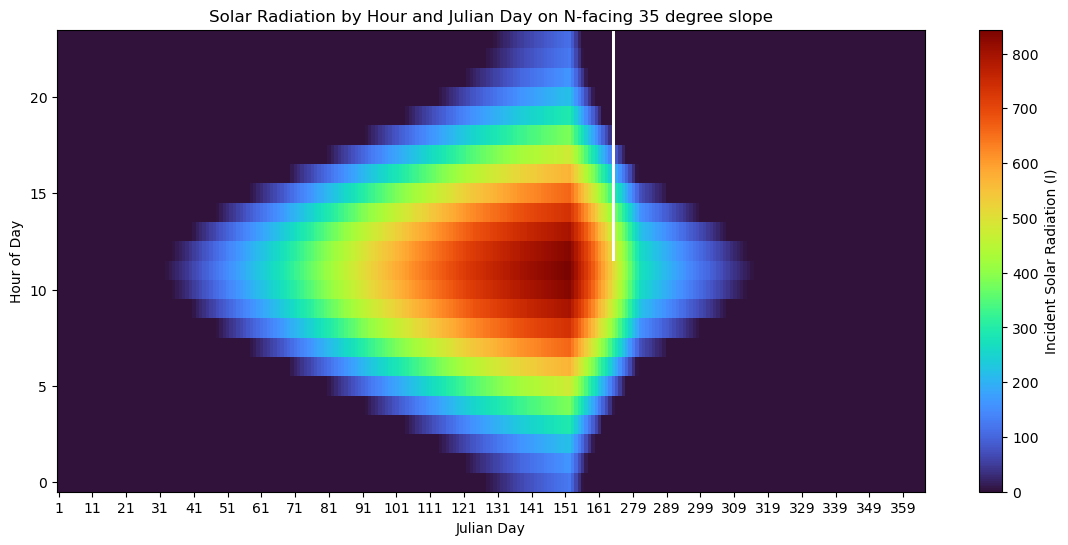

In [12]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I35N')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day on N-facing 35 degree slope')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()

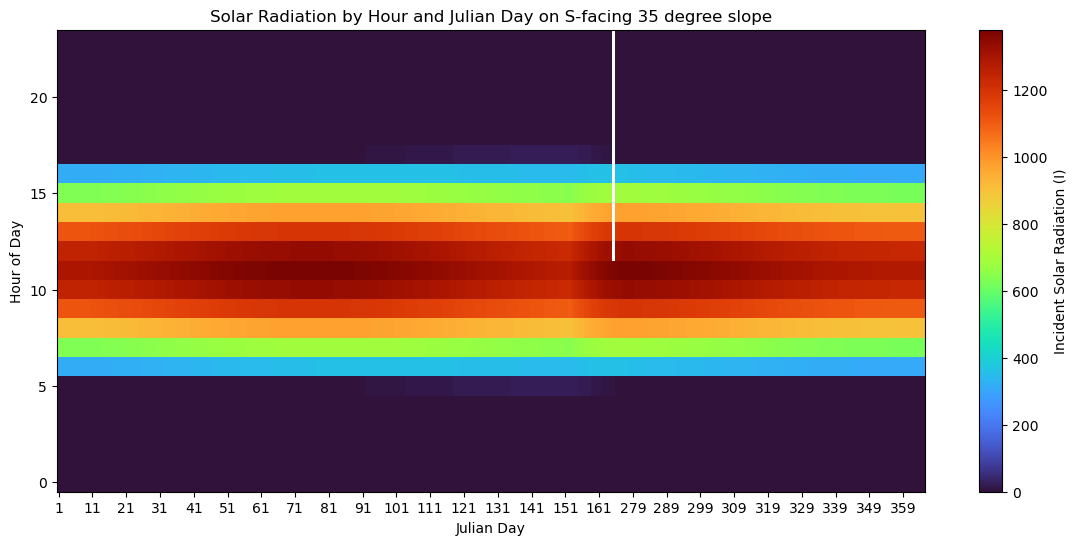

In [13]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I35S')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day on S-facing 35 degree slope')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()

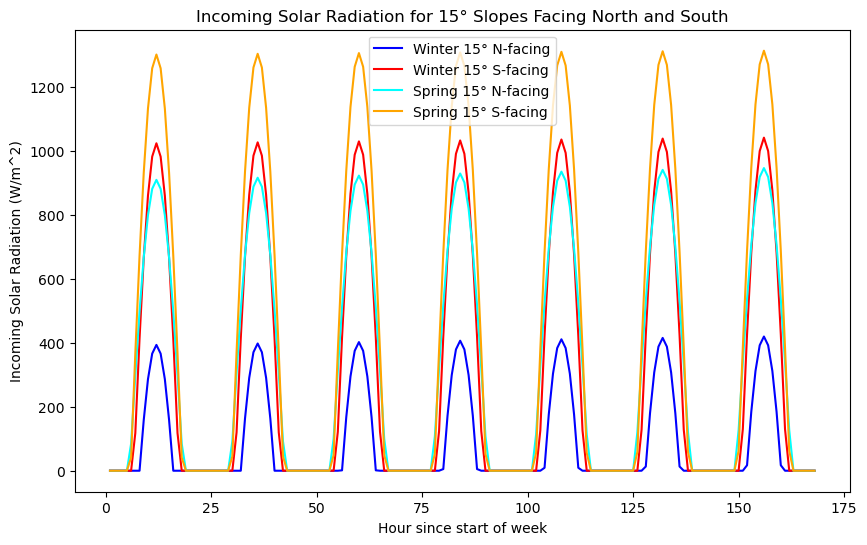

In [14]:
slope=np.radians(15) #15 degree slope
aspect=np.radians(0) #N-facing slope

df['I15N']=I_adj(df['Lat'],df['Dec'],df['H'],slope,aspect,I0,df['e2'])

aspect=np.radians(180) #S-facing slope
df['I15S']=I_adj(df['Lat'],df['Dec'],df['H'],slope,aspect,I0,df['e2'])

fig, ax = plt.subplots(figsize=(10,6))
winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()
winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']
ax.plot(winter['t'], winter['I15N'], label='Winter 15° N-facing', color='blue')
ax.plot(winter['t'], winter['I15S'], label='Winter 15° S-facing', color='red')
ax.plot(spring['t'], spring['I15N'], label='Spring 15° N-facing', color='cyan')
ax.plot(spring['t'], spring['I15S'], label='Spring 15° S-facing', color='orange')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Incoming Solar Radiation for 15° Slopes Facing North and South')
ax.legend()
plt.show()

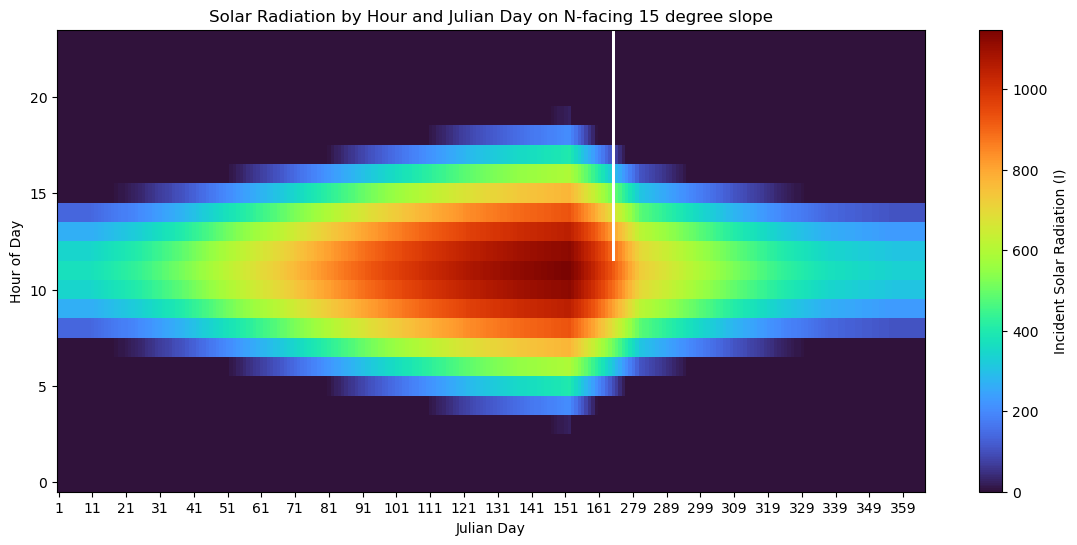

In [15]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I15N')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day on N-facing 15 degree slope')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()


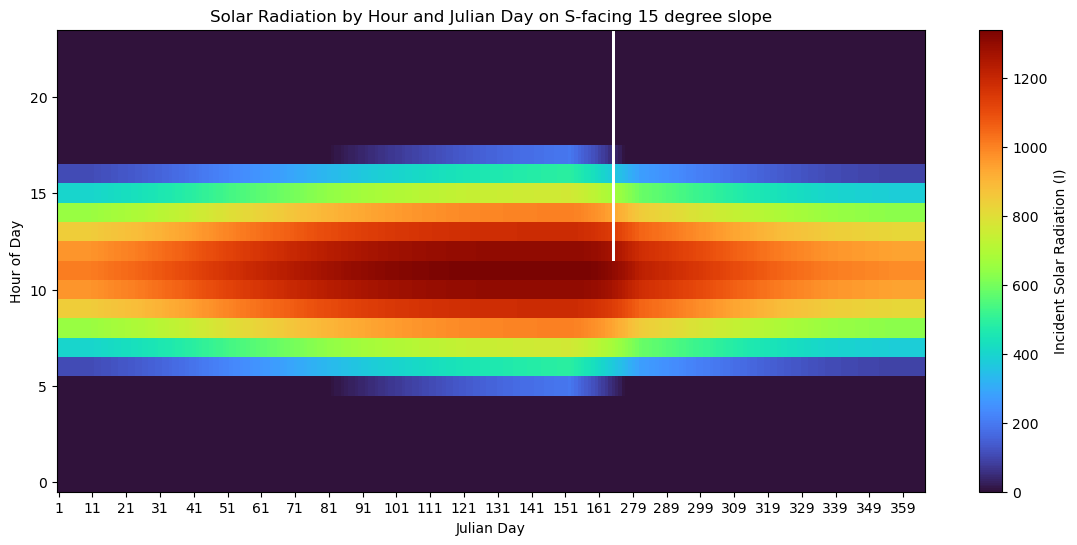

In [16]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I15S')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day on S-facing 15 degree slope')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()

In [17]:
#Incorporating impact of cloud cover, inferring proportion of cloud cover as a function of range in daily temperature (assuming a flat spot, no impact of slope and aspect).

daily=df.groupby('D').agg({'Tmin':'min', 'Tmax':'max'})

daily['delT']=(daily['Tmax']-daily['Tmin'])

df['delT']=df['D'].map(daily['delT'])


df['Cf']=0.7*(1-np.exp(-0.01*df['delT']**2.4))

df['Icc']=df['I']*df['Cf']

print(df.columns)


Index(['D', 'H', 'Tsnow', 'Tmin', 'Tmax', 'Lat', 'Dec', 'e2', 'cosz', 'I',
       'I35N', 'I35S', 'I15N', 'I15S', 'delT', 'Cf', 'Icc'],
      dtype='object')


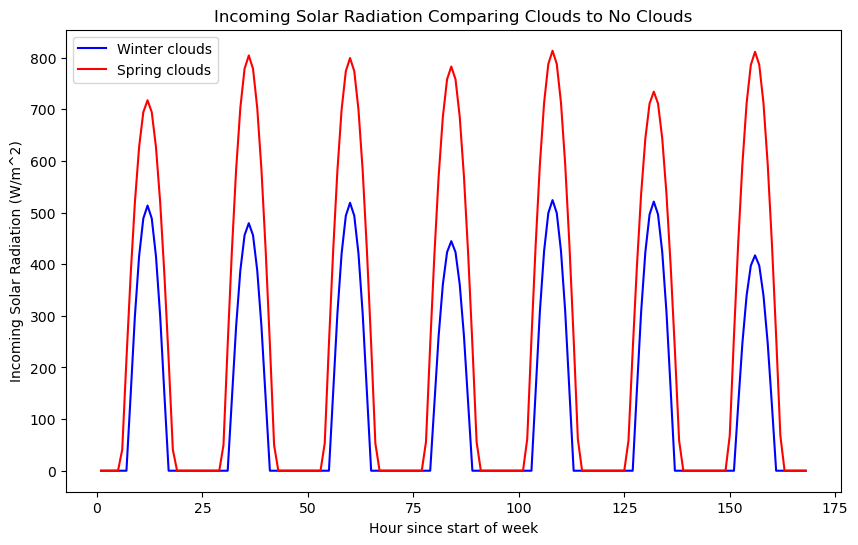

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()
winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']
ax.plot(winter['t'], winter['Icc'], label='Winter clouds', color='blue')
#ax.plot(winter['t'], winter['I'], label='Winter no clouds', color='cyan')
ax.plot(spring['t'], spring['Icc'], label='Spring clouds', color='red')
#ax.plot(spring['t'], spring['I'], label='Spring no clouds', color='orange')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Incoming Solar Radiation Comparing Clouds to No Clouds')
ax.legend()
plt.show()

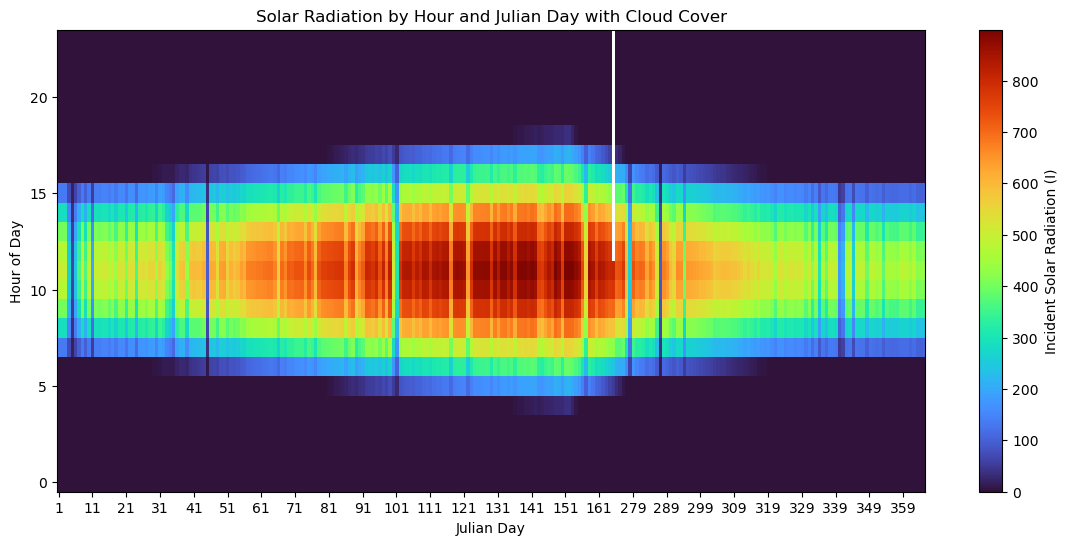

In [19]:
heatmap_data = df.pivot_table(index='H', columns='D', values='Icc')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Solar Radiation by Hour and Julian Day with Cloud Cover')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()


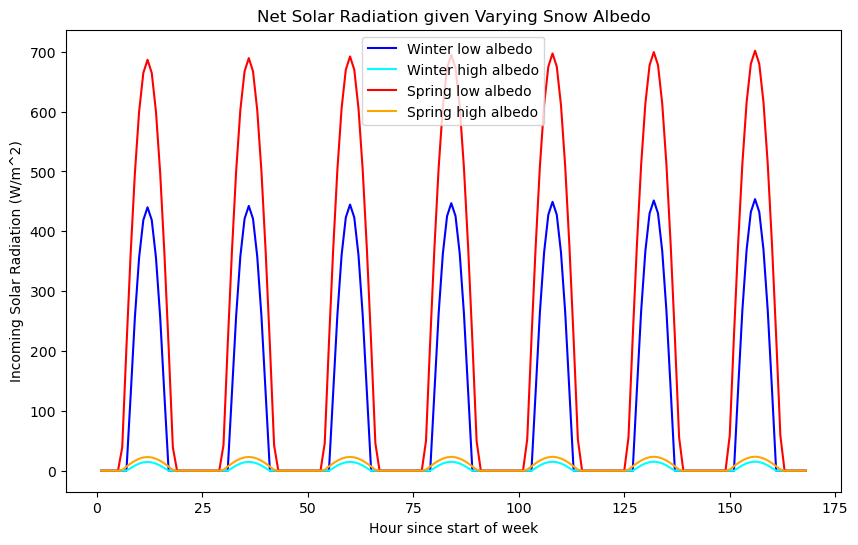

In [21]:
#Now dealing with albedo to get net direct solar radiation (ignoring cloud cover and assuming a flat spot with no slope)

df['I_low_albedo']=(1-0.4)*df['I']
df['I_high_albedo']=(1-0.98)*df['I']

fig, ax = plt.subplots(figsize=(10,6))

winter=df[(df['D']>=15) & (df['D']<=21)].copy()
spring=df[(df['D']>=91) & (df['D']<=97)].copy()
winter['t']=24*(winter['D']-15)+winter['H']
spring['t']=24*(spring['D']-91)+spring['H']
ax.plot(winter['t'], winter['I_low_albedo'], label='Winter low albedo', color='blue')
ax.plot(winter['t'], winter['I_high_albedo'], label='Winter high albedo', color='cyan')
ax.plot(spring['t'], spring['I_low_albedo'], label='Spring low albedo', color='red')
ax.plot(spring['t'], spring['I_high_albedo'], label='Spring high albedo', color='orange')
ax.set_xlabel('Hour since start of week')
ax.set_ylabel('Incoming Solar Radiation (W/m^2)')
ax.set_title('Net Solar Radiation given Varying Snow Albedo')
ax.legend()
plt.show()

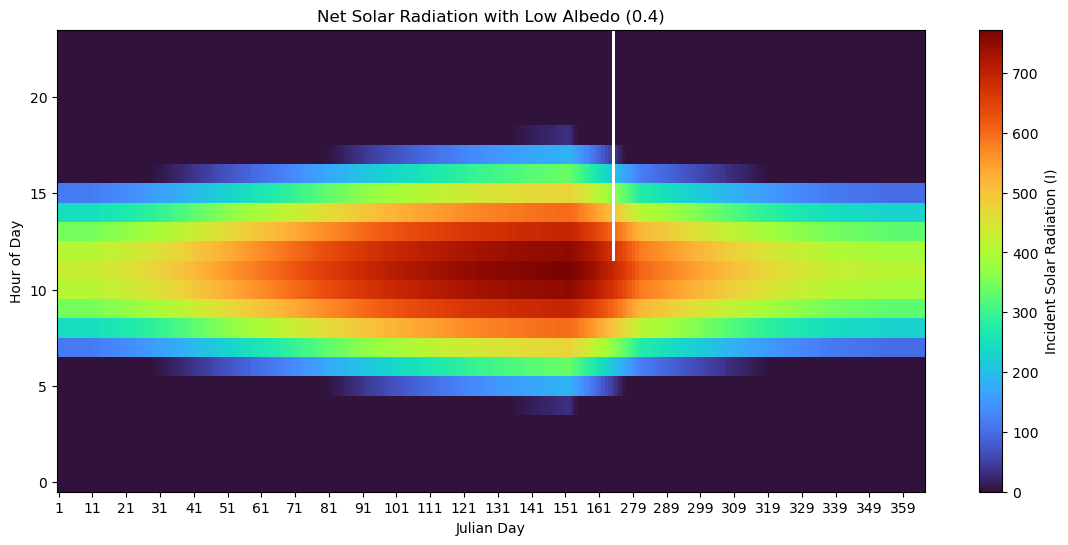

In [22]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I_low_albedo')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Net Solar Radiation with Low Albedo (0.4)')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()

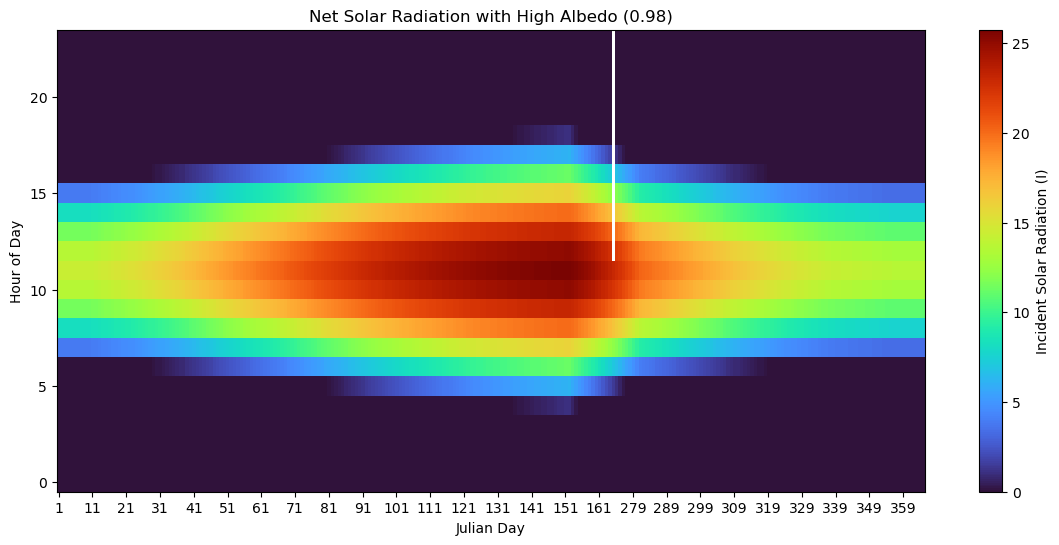

In [23]:
heatmap_data = df.pivot_table(index='H', columns='D', values='I_high_albedo')

plt.figure(figsize=(14,6))
# Plot the heatmap
plt.imshow(heatmap_data, aspect='auto', origin='lower', cmap='turbo')
plt.colorbar(label='Incident Solar Radiation (I)')  # color scale

plt.xlabel('Julian Day')
plt.ylabel('Hour of Day')
plt.title('Net Solar Radiation with High Albedo (0.98)')

# Optional: make x-axis ticks less crowded
plt.xticks(ticks=np.arange(0, len(heatmap_data.columns), 10), 
           labels=heatmap_data.columns[::10])

plt.show()